# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 25.09.2022

Мягкий дедлайн: 23:59MSK 10.10.2022

Жесткий дедлайн: 23:59MSK 18.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!pip install -q kaggle
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                         Diabetes Dataset                                      9KB  2022-10-06 08:55:25           1100         30  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset           COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11            986         31  1.0              
evangower/premier-league-matches-19922022                     Premier League Matches 1992-2022                     78KB  2022-10-03 02:18:33            618         24  1.0              
whenamancodes/student-performance                             Student 

In [ ]:
!kaggle competitions download -c nyc-taxi-trip-duration

nyc-taxi-trip-duration.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir -p nyc-taxi-trip-duration
!unzip -n nyc-taxi-trip-duration.zip -d nyc-taxi-trip-duration

Archive:  nyc-taxi-trip-duration.zip


In [ ]:
df = pd.read_csv('nyc-taxi-trip-duration/train.zip')

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df.drop(labels='dropoff_datetime', axis=1, inplace=True)

In [ ]:
from datetime import datetime
df.loc[:, 'pickup_datetime'] = \
  df.loc[:, 'pickup_datetime'].apply(lambda s: datetime.strptime(s, '%Y-%m-%d %H:%M:%S'))

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

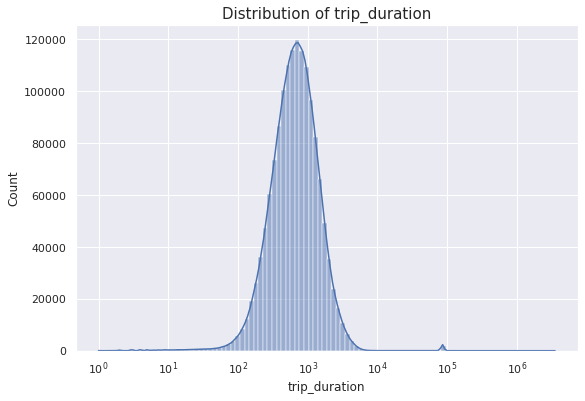

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axes = plt.subplots(figsize=(9, 6))
axes.set_title('Distribution of trip_duration', fontsize=15)
sns.histplot(data=df['trip_duration'], ax=axes, bins=100, log_scale=True, kde=True)

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

***У нас есть парочка выбросов порядка 10^5 секунд, то есть примерно 28 часов. Судя по всему, это баги системы либо недочёты таксистов, в любом случае их лучше будет выкинуть. Ещё стоит отмести небольшое количество поездок по несколько секунд.***

***Судя по графику, мы можем говорить о логнормальном распределнии нашей trip_duration.***

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

***В MSLE мы штрафуем за порядковые отклонения.***

***Логично использовать её, раз у нашей целевой переменной лог-нормальное распределение.***

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

$$\text{MSE}(X, \hat{y}, \hat{a}) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2 =
\text{MSLE}(X, y, a)$$

Очевидно, что $\text{MSLE}$ минимально в той же точке, что и $\text{RMSLE}$.


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['log_trip_duration'] = np.log1p(df['trip_duration'])

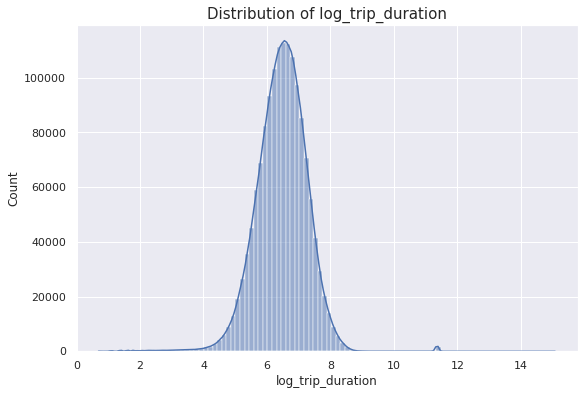

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))
axes.set_title('Distribution of log_trip_duration', fontsize=15)
sns.histplot(data=df['log_trip_duration'], ax=axes, bins=100, kde=True)

In [ ]:
df_trip_duration = df['trip_duration'].copy()

In [ ]:
df.drop(labels='trip_duration', axis=1, inplace=True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def MSE(y, y_pred):
  assert len(y) == len(y_pred), 'y and y_pred must have the same size'
  return (sum((y[i] - y_pred[i]) ** 2 for i in range(len(y)))) / len(y)

def RMSLE(y, y_pred):
  assert len(y) == len(y_pred), 'y and y_pred must have the same size'
  return np.sqrt(sum((np.log(y[i] + 1) - np.log(y_pred[i] + 1)) ** 2 for i in range(len(y))))

In [ ]:
best_const_pred = df['log_trip_duration'].mean()
best_const_RMSLE = np.sqrt(MSE(df['log_trip_duration'], 
                               [best_const_pred] * df.shape[0]))

print('Best constant predict:', best_const_pred)
print('Having RMSLE:', best_const_RMSLE)

Best constant predict: 6.466978409297406
Having RMSLE: 0.795759236541271


In [ ]:
from sklearn.metrics import mean_squared_error
best_const_RMSLE_sklearn = mean_squared_error(df['log_trip_duration'], 
                                              [best_const_pred] * df.shape[0], 
                                              squared=False)

assert abs(best_const_RMSLE - best_const_RMSLE_sklearn) < 1e-6, 'sanity check failed'

In [ ]:
print('Other predict, for instance:', 7.0)
print('Having RMSLE:', np.sqrt(MSE(df['log_trip_duration'], [7.0] * df.shape[0])))

Other predict, for instance: 7.0
Having RMSLE: 0.9577811747450341


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.ticker as ticker
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [ ]:
df['pickup_datetime'].agg(['min', 'max'])

min   2016-01-01 00:00:17
max   2016-06-30 23:59:39
Name: pickup_datetime, dtype: datetime64[ns]

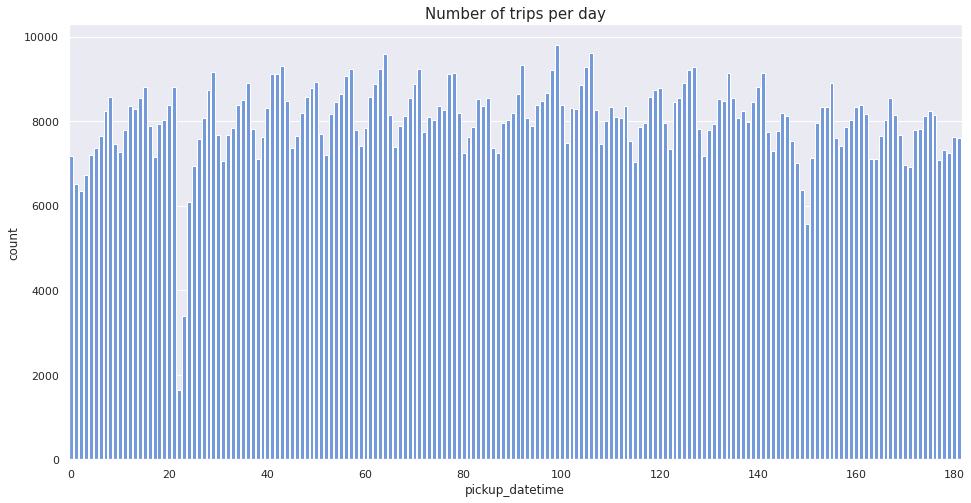

In [ ]:
fig, axes = plt.subplots(figsize=(16, 8))
axes.set_title('Number of trips per day', fontsize=15)
g = sns.countplot(
    x=df['pickup_datetime'].dt.strftime('%j').sort_values(),
    ax=axes, color='cornflowerblue')
g.set(xticklabels=[])
axes.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
axes.xaxis.set_major_locator(ticker.MultipleLocator(base=20))
g

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [ ]:
df['pickup_datetime'].isnull().values.sum()

0

In [ ]:
df_by_days = df.copy()
df_by_days.loc[:,'pickup_datetime'] = df_by_days['pickup_datetime'].dt.strftime('%Y-%m-%d')
df_grouped_by_days = df_by_days[['id', 'pickup_datetime']].groupby('pickup_datetime').count()
df_grouped_by_days.loc[df_grouped_by_days['id'] < 4000]

,id
pickup_datetime,
2016-01-23,1648
2016-01-24,3383


***Дороги замело, милорд!***

***В эти дни в Нью-Йорке была невиданная метель, которая покрыла улицы 90 см снега.***

**[New York blizzard](https://en.wikipedia.org/wiki/January_2016_United_States_blizzard)**



In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ ~~> Я СТРАДАЛ

weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['hour'] = df['pickup_datetime'].dt.hour

# df_train_weekday = df_train.groupby('weekday')[['id']].count()
# df_train_weekday.reset_index(inplace=True)
# df_train_weekday.rename(columns={'index' : 'weekday', 'id' : 'trips per weekday'}, inplace=True)

# df_train_hour = df_train.groupby('hour')[['id']].count()
# df_train_hour.reset_index(inplace=True)
# df_train_hour.rename(columns={'index' : 'hour', 'id' : 'trips per hour'}, inplace=True)

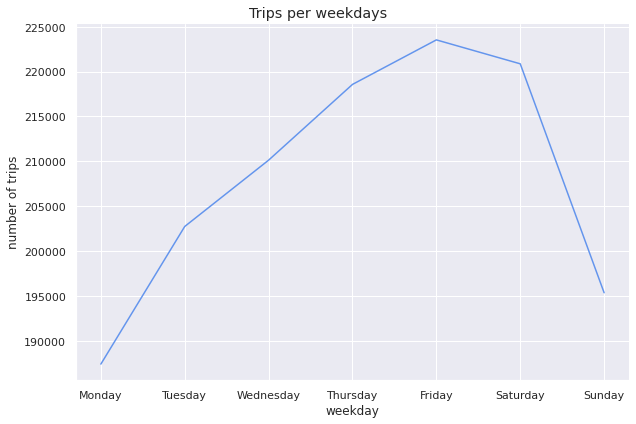

In [ ]:
weekday_relplot = sns.relplot(
    data=df['weekday'].value_counts().sort_values().reindex(weekdays_order),
    kind='line', color='cornflowerblue', height=6, aspect=1.5
)

weekday_relplot.fig.suptitle('Trips per weekdays')
plt.subplots_adjust(top=0.94)
weekday_relplot.set_xlabels('weekday')
weekday_relplot.set_ylabels('number of trips')
weekday_relplot

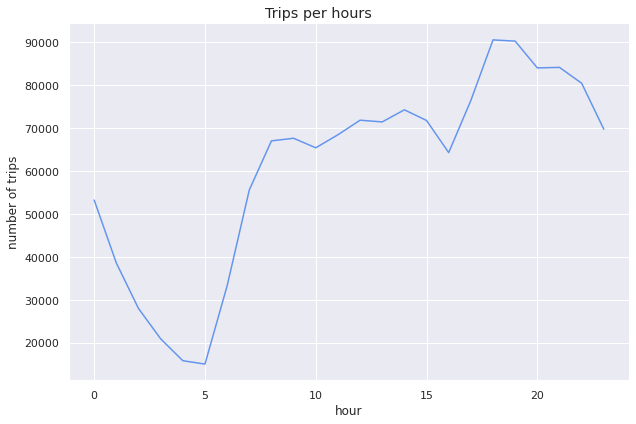

In [ ]:
hour_relplot = sns.relplot(
    data=df['hour'].value_counts().sort_values(),
    kind='line', color='cornflowerblue', height=6, aspect=1.5
)

hour_relplot.fig.suptitle('Trips per hours')
plt.subplots_adjust(top=0.94)
hour_relplot.set_xlabels('hour')
hour_relplot.set_ylabels('number of trips')
hour_relplot

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

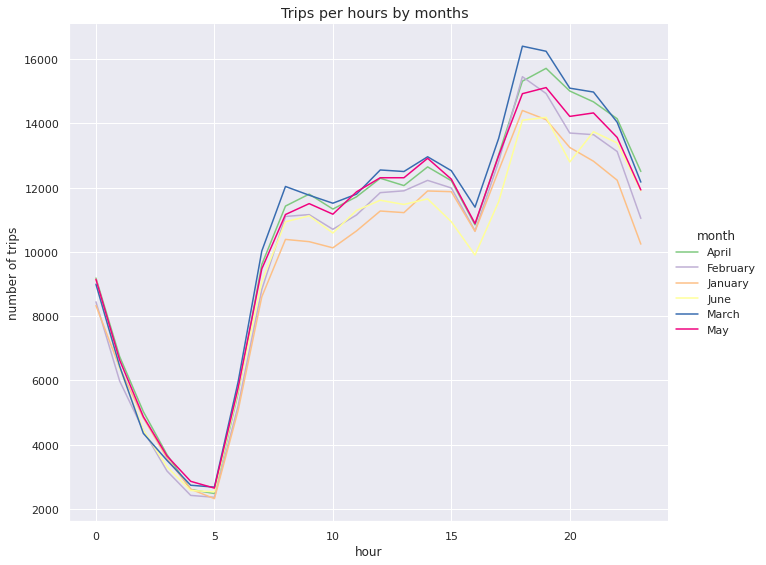

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# ['January', 'February', 'March', 'April', 'May', 'June', 
#  'July', 'August', 'September', 'October', 'November', 'December'] 

df['month'] = df['pickup_datetime'].dt.month_name()
df_cur = df.groupby(['month', 'hour'])[['id']].count()
df_cur = df_cur.reset_index().rename(columns={'id' : 'number of trips'})
df_cur

hourmonth_relplot = sns.relplot(
    data=df_cur, x='hour', y='number of trips', hue='month',
    kind='line', height=8, aspect=1.2, palette="Accent"
)

hourmonth_relplot.fig.suptitle('Trips per hours by months')
plt.subplots_adjust(top=0.95)
hourmonth_relplot.set_xlabels('hour')
hourmonth_relplot.set_ylabels('number of trips')

# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend([handles[idx] for idx in month_order],[labels[idx] for idx in order])

hourmonth_relplot

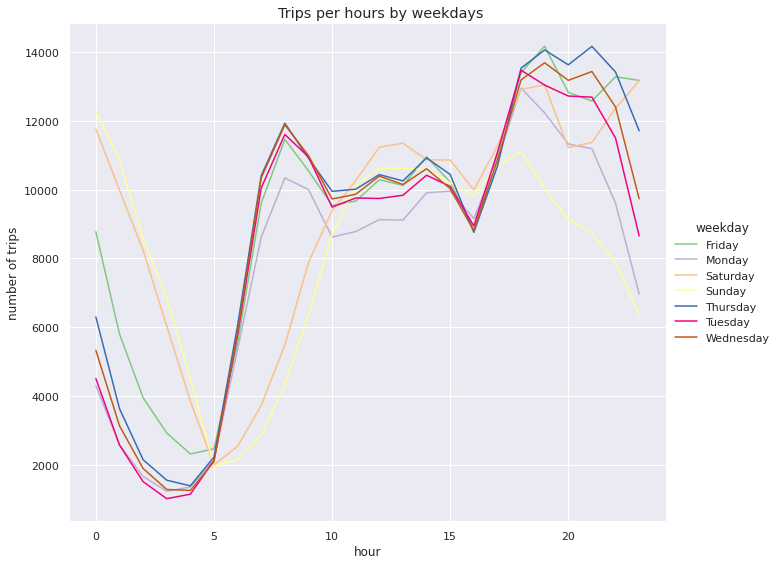

In [ ]:
df_cur = df.groupby(['weekday', 'hour'])[['id']].count()
df_cur = df_cur.reset_index().rename(columns={'id' : 'number of trips'})
df_cur

hourweek_relplot = sns.relplot(
    data=df_cur, x='hour', y='number of trips', hue='weekday',
    kind='line', height=8, aspect=1.2, palette='Accent'
)

hourweek_relplot.fig.suptitle('Trips per hours by weekdays')
plt.subplots_adjust(top=0.95)
hourweek_relplot.set_xlabels('hour')
hourweek_relplot.set_ylabels('number of trips')
hourweek_relplot

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

***Больше всего люди катаются в Марте и Апреле, поменьше - в Июне (что логично, хорошая погода и кто-то уже едет в отпуск) и в Январе (заканчивается отдых, все дела). Тем не менее, разница по месяцам некритичная, хотя в 18-19 часов разница между месяцами может достигать 2000 поездок.***

***По дням недели очевидно выделяются суббота и воскресенье, также заметные различия по ночным поездкам в пятницу. Интересно, что по субботним вечерам число поездок сравнимо с буднями днями, в то время как в воскресенье их существенно меньше.***

***По времени суток: с 6 утра рост поездок на работу, да и просто люди просыпаются и едут куда-то с утра, как в выходные; в полдень и около того всё стабильно, вечером с 18 люди много катаются после работы.*** 

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

# У МЕНЯ СГОРЕЛА ЗАДНИЦА НА ПОИСК НУЖНОГО СПОСОБА ОТСОРТИТЬ ИМЕНА В SNS.RELPLOT.
# КАЖДЫЙ РАЗ ЧТО-ТО НЕ РАБОТАЕТ ИЛИ СПОСОБА ТУПО НЕТ.
# ПОЭТОМУ Я СДАЛСЯ И ПЕРЕИМЕНОВАЛ WEEKDAY КОЛОНКУ ОБРАТНО В ЦИФРЫ.
# ПОСТАВЬТЕ СВЕЧКУ.
# ⁀⊙﹏☉⁀  

df['weekday'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month
df['day_of_year'] = df['pickup_datetime'].dt.strftime('%j').astype(int)

df_train, df_test, y_train, y_test = train_test_split(
    df, df.loc[:,'log_trip_duration'],
    test_size=0.3, random_state=42
)

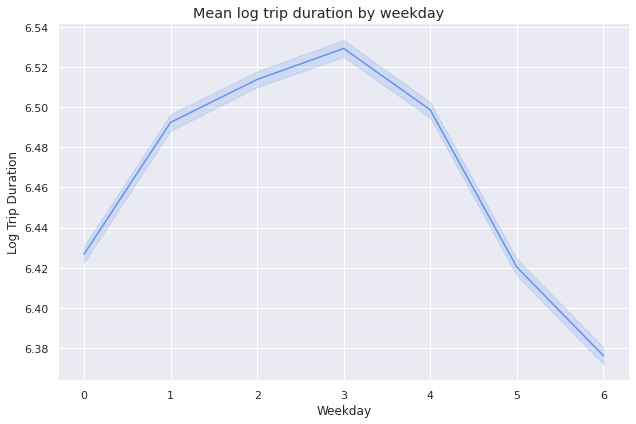

In [ ]:
log_duration_by_weekday_relplot = sns.relplot(
    data=df_train, x='weekday', y='log_trip_duration', 
    kind='line', height=6, aspect=1.5, color='cornflowerblue'
)

# log_duration_by_weekday_relplot.axes[0, 0].set_xticklabels(weekdays_order)
log_duration_by_weekday_relplot.fig.suptitle('Mean log trip duration by weekday')
plt.subplots_adjust(top=0.94)
log_duration_by_weekday_relplot.set_xlabels('Weekday')
log_duration_by_weekday_relplot.set_ylabels('Log Trip Duration')
plt.show()

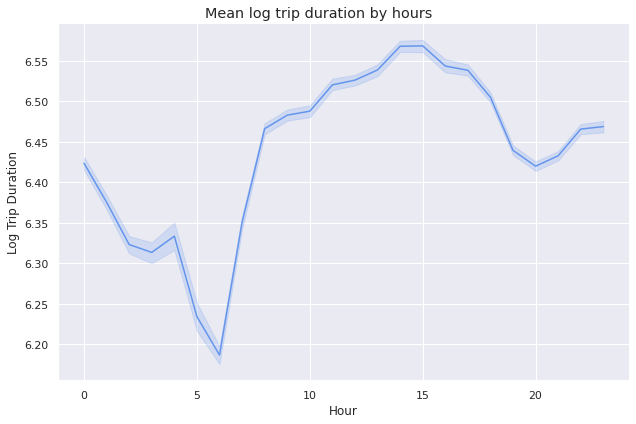

In [ ]:
log_duration_by_hour_relplot = sns.relplot(
    data=df_train, x='hour', y='log_trip_duration', 
    kind='line', height=6, aspect=1.5, color='cornflowerblue'
)

log_duration_by_hour_relplot.fig.suptitle('Mean log trip duration by hours')
plt.subplots_adjust(top=0.94)
log_duration_by_hour_relplot.set_xlabels('Hour')
log_duration_by_hour_relplot.set_ylabels('Log Trip Duration')
plt.show()

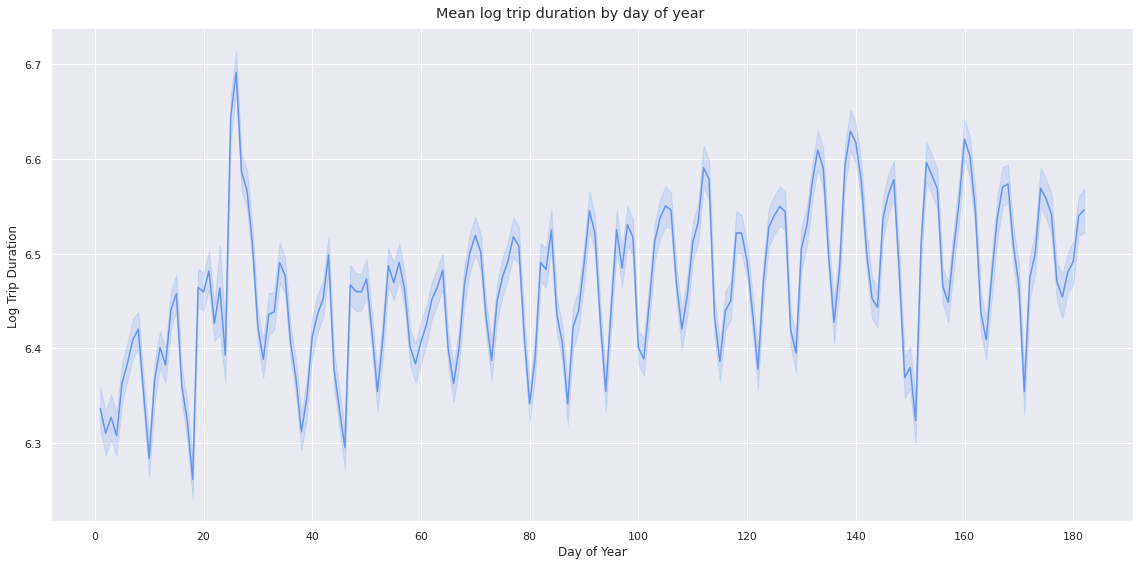

In [ ]:
log_duration_by_day_of_year_relplot = sns.relplot(
    data=df_train, x='day_of_year', y='log_trip_duration', 
    kind='line', height=8, aspect=2, color='cornflowerblue'
)

log_duration_by_day_of_year_relplot.fig.suptitle('Mean log trip duration by day of year')
plt.subplots_adjust(top=0.94)
log_duration_by_day_of_year_relplot.set_xlabels('Day of Year')
log_duration_by_day_of_year_relplot.set_ylabels('Log Trip Duration')

plt.gca().set(xticklabels=[])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=20))

plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

***В субботу и воскресенье продолжительность поездок существенно проседает, но и в течение рабочей недели колебания значительны.***

***А вот график по часам сильно похож на предыдущий. Это логично: количество поездок за данный час достаточно хорошо отражает ситуацию с пробками на дорогах, которая очевидно влияет на продолжительность поездки.***

***Теперь график по дням в году. Аномальная метель и мб парочка дней после неё сразу резко выделяются увеличенным временем поездок, так как на дорогах куча снега. В целом тренд на незначительное увеличение времени поездки, достаточно внезапно. Оказывается, ближе к лету люди проводят в дорогах побольше времени, чем зимой. По крайней мере в случае поездок на такси.***

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# колонки кроме аномалий уже есть

# df_train['is_first_anomaly'] = False
# df_train.loc[df_['day_of_year'] == 23, 'is_first_anomaly'] = True
# df_train['is_second_anomaly'] = False
# df_train.loc[df['day_of_year'] == 24, 'is_second_anomaly'] = True

# df_test['is_first_anomaly'] = False
# df_test.loc[df['day_of_year'] == 23, 'is_first_anomaly'] = True
# df_test['is_second_anomaly'] = False
# df_test.loc[df['day_of_year'] == 24, 'is_second_anomaly'] = True

df['is_first_anomaly'] = False
df.loc[df['day_of_year'] == 23, 'is_first_anomaly'] = True
df['is_second_anomaly'] = False
df.loc[df['day_of_year'] == 24, 'is_second_anomaly'] = True


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

***Хм, ну я бы рассматривал номер дня в году как численный признак, также как и месяц - так как есть какой-то общий тренд, мы приблизим его линейной функцией от этого значения при прочих равных. Хотя про месяц не так очевидно, ведь какие-то различия по нему присутствуют. Потестил оба варианта; если пихать месяц в категориальные признаки, то $\text{RMSE}$ меньше на $4 \cdot 10^{-5}$. Другими словами, в целом пофиг, но решил что логичнее пихнуть в категориальные.***

***Аномалии очевидно категориальные.***

***День недели и час - тоже, линейной функцией от них таргет не оценишь, тем более влияют они существенно.***

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
log_trip_duration            float64
weekday                        int64
hour                           int64
month                          int64
day_of_year                    int64
is_first_anomaly                bool
is_second_anomaly               bool
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:, df.columns != 'log_trip_duration'], df.loc[:,'log_trip_duration'],
    test_size=0.3, random_state=42
)

In [ ]:
numeric_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 
                    'dropoff_longitude', 'dropoff_latitude', 'day_of_year']
categorical_features = ['vendor_id', 'store_and_fwd_flag', 'month', 'weekday', 
                        'hour', 'is_first_anomaly', 'is_second_anomaly']

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# это немного нагло скопипасченный код с семинара
# но я честно почитал доки и разобрался че как работает
# просто код оттуда выглядит красивым и даже хз что менять ... U w U

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


column_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('ridge_regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Test RMSE = %.9f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.9f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Best Const Pred Test RMSE = %.9f" % 
      mean_squared_error(y_test, [y_test.mean()] * len(y_test), squared=False))
print("Best Const Pred Train RMSE = %.9f" % 
      mean_squared_error(y_train, [y_train.mean()] * len(y_train), squared=False))

Test RMSE = 0.772462641
Train RMSE = 0.771601546
Best Const Pred Test RMSE = 0.795026901
Best Const Pred Train RMSE = 0.796072873


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

***Помимо Манхэттэна, это Аэропорт ЛаГвардия и Аэропорт Кэннэди.***

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
  
df['haversine'] = haversine_array(
    df['pickup_latitude'].values, df['pickup_longitude'].values, 
    df['dropoff_latitude'].values, df['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['log_haversine'] = np.log1p(df['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Correlation between log_trip_duration and haversine:', 
      df.loc[:, 'log_trip_duration'].corr(df.loc[:, 'haversine']))

print('Correlation between log_trip_duration and log_haversine:', 
      df.loc[:, 'log_trip_duration'].corr(df.loc[:, 'log_haversine']))

Correlation between log_trip_duration and haversine: 0.5735948311180146
Correlation between log_trip_duration and log_haversine: 0.7498822373942495


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [ ]:
print('Haversine mean:', df['haversine'].mean())
print('Trip duration mean:', df_trip_duration.mean())

Haversine mean: 3.4408639020108867
Trip duration mean: 959.4922729603659


In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# df.loc[:, 'log_mean_velocity'] = df.loc[:, 'log_haversine'] - df.loc[:, 'log_trip_duration']
df['mean_velocity'] = df.loc[:, 'haversine'] / (df_trip_duration / 3600) # [km / h]
df['log_mean_velocity'] = np.log1p(df.loc[:, 'mean_velocity'])

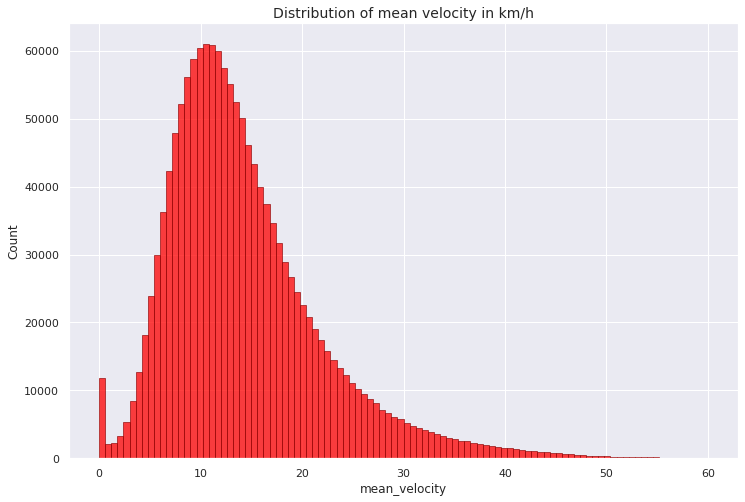

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_title('Distribution of mean velocity in km/h', fontsize=14)
mean_velocity_hist = sns.histplot(df.loc[:, 'mean_velocity'], ax=axes, 
                                  bins=100, binrange=(0, 60),
                                  color='red', edgecolor='darkred')
plt.show()

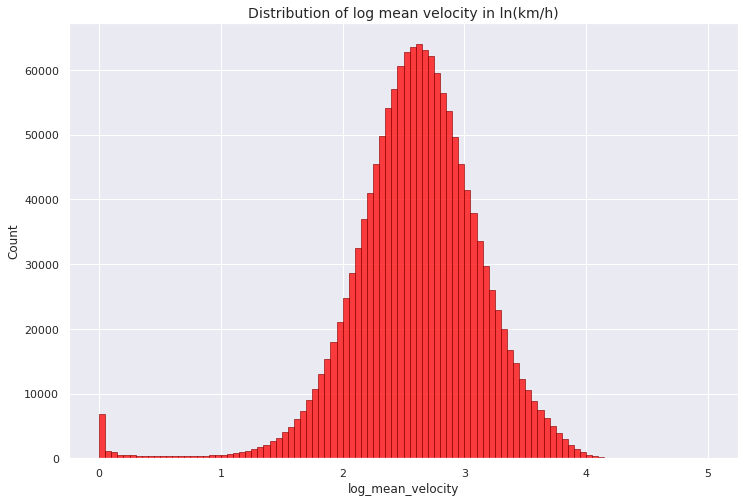

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_title('Distribution of log mean velocity in ln(km/h)', fontsize=14)
mean_velocity_hist = sns.histplot(df.loc[:, 'log_mean_velocity'], ax=axes, 
                                  bins=100, binrange=(0, 5),
                                  color='red', edgecolor='darkred')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

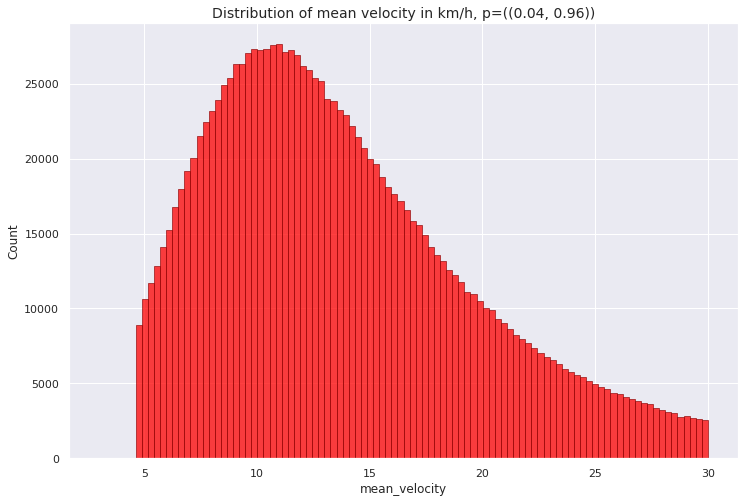

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
p = 0.96
p_quantile_under = df['mean_velocity'].quantile(q=p)
p_quantile_above = df['mean_velocity'].quantile(q=1 - p)
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_title(f'Distribution of mean velocity in km/h, p=({round(1 - p, 2), p})', fontsize=14)
mean_velocity_hist = sns.histplot(
    df.loc[(df['mean_velocity'] >= p_quantile_above) &
           (df['mean_velocity'] <= p_quantile_under), 'mean_velocity'], 
           ax=axes, bins=100, binrange=(3, 30), color='red', edgecolor='darkred')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

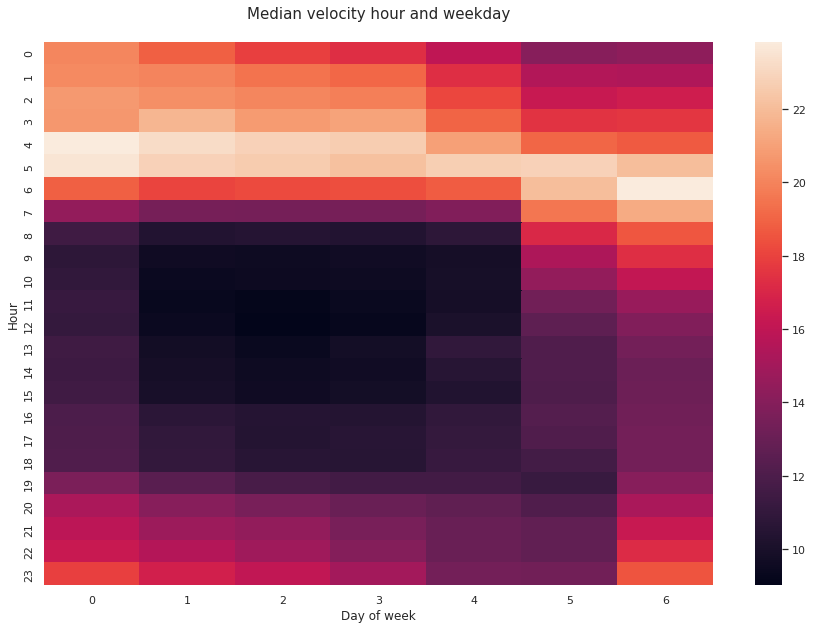

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_med_v_by_wh = pd.pivot_table(data=df, index='hour', columns='weekday', 
                                values='mean_velocity', aggfunc=np.median)

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_med_v_by_wh, ax=ax)
ax.set_title('Median velocity hour and weekday\n', fontsize=15)
ax.set_xlabel('Day of week', fontsize=12)
ax.set_ylabel('Hour', fontsize=12)
plt.show()


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

***Скорость зависит от таргета - плохо дело.***

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df.drop(labels=['mean_velocity', 'log_mean_velocity'], axis=1, inplace=True)

In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
log_trip_duration            float64
weekday                        int64
hour                           int64
month                          int64
day_of_year                    int64
is_first_anomaly                bool
is_second_anomaly               bool
haversine                    float64
log_haversine                float64
dtype: object

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
free_roads_conditions = (
    ((df['weekday'] < 5) & (df['hour'] < 7)) | 
    ((df['weekday'] >= 5) & (df['hour'] < 10)) | 
    (((df['weekday'] + 1) % 7 < 2) & (df['hour'] > 21))
)
df['trip_on_free_roads'] = np.where(free_roads_conditions, True, False)


jam_roads_conditions = (
    (df['weekday'] < 5) & (df['hour'] > 7) & (df['hour'] < 19)
)
df['trip_on_jam_roads'] = np.where(jam_roads_conditions, True, False)

In [ ]:
df.loc[:, 'trip_on_free_roads'].value_counts()

False    1192464
True      266180
Name: trip_on_free_roads, dtype: int64

In [ ]:
df.loc[:, 'trip_on_jam_roads'].value_counts()

False    883863
True     574781
Name: trip_on_jam_roads, dtype: int64

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# intervals for Airports' latitudes and longitudes
LaGuardia_location_lat = (40.76, 40.78)
LaGuardia_location_long = (-73.89, -73.85)

Kennedy_location_lat = (40.63, 40.66)
Kennedy_location_long = (-73.80, -73.77)

df['pickup_LaGuardia'] = np.where(
    (df['pickup_latitude'] >= LaGuardia_location_lat[0]) &
    (df['pickup_latitude'] <= LaGuardia_location_lat[1]) &
    (df['pickup_longitude'] >= LaGuardia_location_long[0]) &
    (df['pickup_longitude'] <= LaGuardia_location_long[1]),
    True, False)

df['dropoff_LaGuardia'] = np.where(
    (df['dropoff_latitude'] >= LaGuardia_location_lat[0]) &
    (df['dropoff_latitude'] <= LaGuardia_location_lat[1]) &
    (df['dropoff_longitude'] >= LaGuardia_location_long[0]) &
    (df['dropoff_longitude'] <= LaGuardia_location_long[1]),
    True, False)


df['pickup_Kennedy'] = np.where(
    (df['pickup_latitude'] >= Kennedy_location_lat[0]) &
    (df['pickup_latitude'] <= Kennedy_location_lat[1]) &
    (df['pickup_longitude'] >= Kennedy_location_long[0]) &
    (df['pickup_longitude'] <= Kennedy_location_long[1]),
    True, False)

df['dropoff_Kennedy'] = np.where(
    (df['dropoff_latitude'] >= Kennedy_location_lat[0]) &
    (df['dropoff_latitude'] <= Kennedy_location_lat[1]) &
    (df['dropoff_longitude'] >= Kennedy_location_long[0]) &
    (df['dropoff_longitude'] <= Kennedy_location_long[1]),
    True, False)


In [ ]:
print('LaGuardia pickups:', df.loc[df['pickup_LaGuardia'] == True].shape[0])
print('LaGuardia dropoffs:', df.loc[df['dropoff_LaGuardia'] == True].shape[0])
print('Kennedy pickups:', df.loc[df['pickup_Kennedy'] == True].shape[0])
print('Kennedy dropoffs:', df.loc[df['dropoff_Kennedy'] == True].shape[0])

LaGuardia pickups: 37098
LaGuardia dropoffs: 18425
Kennedy pickups: 31576
Kennedy dropoffs: 12117


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

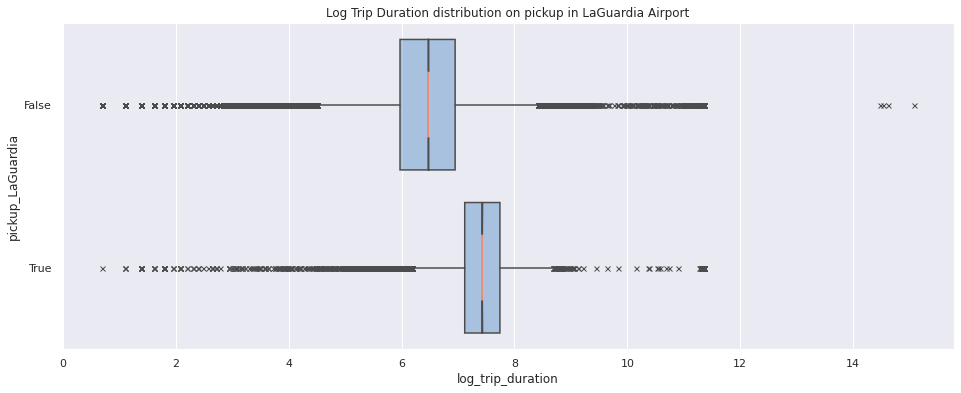

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(data=df, y='pickup_LaGuardia', x='log_trip_duration', 
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, 
    orient='h')
ax.set_title('Log Trip Duration distribution on pickup in LaGuardia Airport')
plt.show()

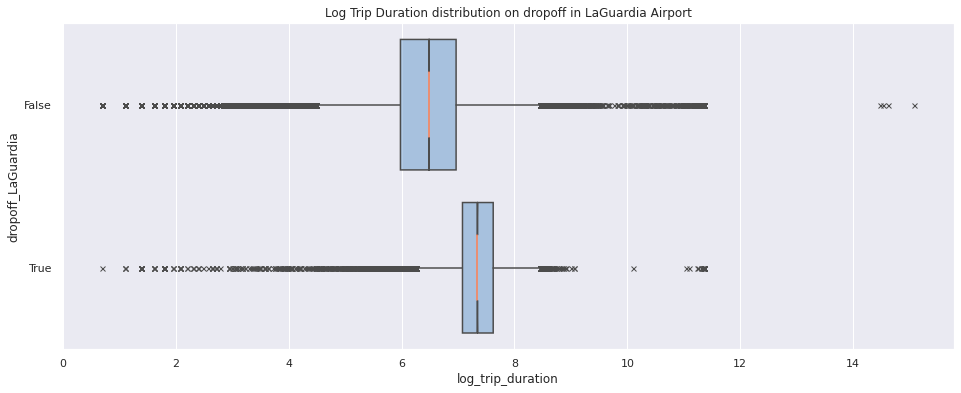

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(data=df, y='dropoff_LaGuardia', x='log_trip_duration', 
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, 
    orient='h')
ax.set_title('Log Trip Duration distribution on dropoff in LaGuardia Airport')
plt.show()

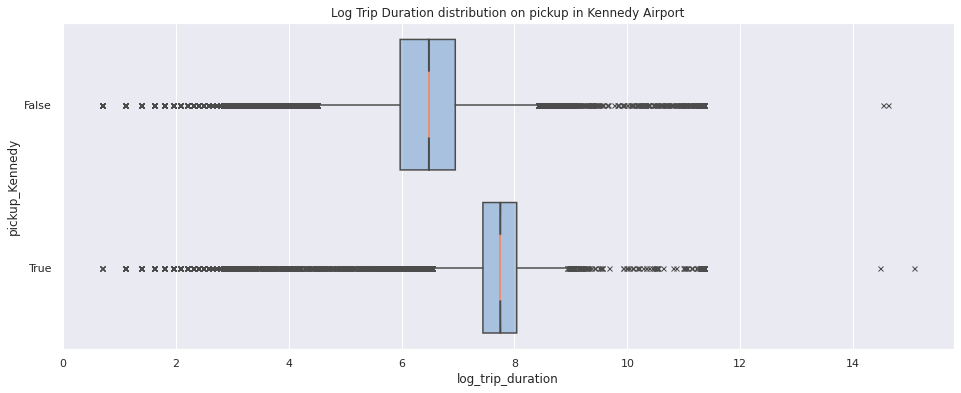

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(data=df, y='pickup_Kennedy', x='log_trip_duration', 
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, 
    orient='h')
ax.set_title('Log Trip Duration distribution on pickup in Kennedy Airport')
plt.show()

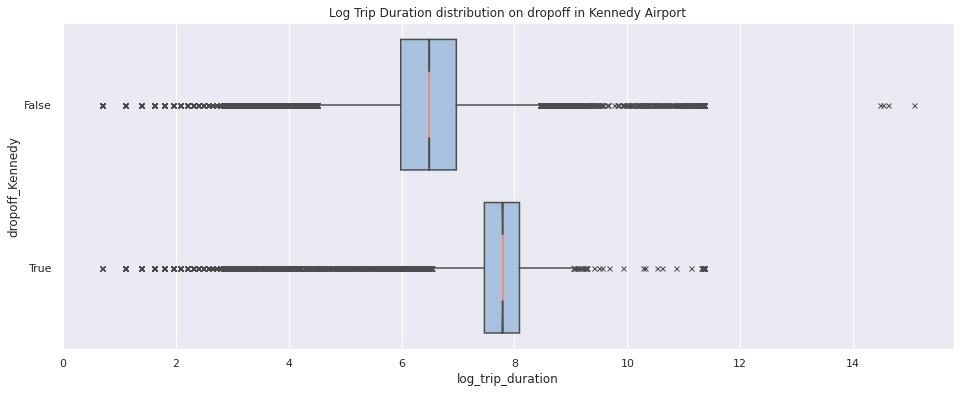

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(data=df, y='dropoff_Kennedy', x='log_trip_duration', 
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, 
    orient='h')
ax.set_title('Log Trip Duration distribution on dropoff in Kennedy Airport')
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

***Судя по тому, что коробки мат ожиданий с дисперсиями не пересекаются по таргету - норм признаки.***

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, lower_left_corner=(40.7, -74.019), 
                 upper_right_corner=(40.8, -73.94), 
                 latitude_cells=4,
                 longitude_cells=3):
      self.latitude_cells = latitude_cells
      self.longitude_cells = longitude_cells
      self.lower_left_corner = lower_left_corner
      self.upper_right_corner = upper_right_corner
      self.latitude_cells = latitude_cells
      self.longitude_cells = longitude_cells


    def show_map(self):        
        location = ((self.lower_left_corner[0] + self.upper_right_corner[0]) / 2,
                    (self.lower_left_corner[1] + self.upper_right_corner[1]) / 2)
        
        map_image = folium.Map(location=location, zoom_start=12)

        for latitude in self.latitude_grid:
            segment = [(latitude, self.longitude_grid[0]),
                      (latitude, self.longitude_grid[-1])]
            folium.PolyLine(segment, color="red", weight=2).add_to(map_image)
        
        for longitude in self.longitude_grid:
            segment = [(self.latitude_grid[0], longitude),
                      (self.latitude_grid[-1], longitude)]
            folium.PolyLine(segment, color="red", weight=2).add_to(map_image)

        return map_image
    
    
    def fit(self, X=None, y=None):
        latitude_diff = self.upper_right_corner[0] - self.lower_left_corner[0]
        self.latitude_grid = [-90.0]
        self.latitude_grid.extend([
            self.lower_left_corner[0] + latitude_diff * (d / self.latitude_cells) \
            for d in range(self.latitude_cells + 1)
        ])
        self.latitude_grid.append(90.0)

        longitude_diff = self.upper_right_corner[1] - self.lower_left_corner[1]
        self.longitude_grid = [-180.0]
        self.longitude_grid.extend([
            self.lower_left_corner[1] + longitude_diff * (d / self.longitude_cells) \
            for d in range(self.longitude_cells + 1)
        ])
        self.longitude_grid.append(180.0)
        
        return self

    def get_cell_num(self, row, is_pickup):
        if is_pickup:
            latitude, longitude = row['pickup_latitude'], row['pickup_longitude']
        else:
            latitude, longitude = row['dropoff_latitude'], row['dropoff_longitude']
        
        lat_ind = next(i for i, value in enumerate(self.latitude_grid) if value >= latitude)
        long_ind = next(i for i, value in enumerate(self.longitude_grid) if value >= longitude)

        if (lat_ind in [1, len(self.latitude_grid) - 1]) or \
                (long_ind in [1, len(self.longitude_grid) - 1]):
            return -1
        assert (lat_ind - 2) * self.longitude_cells + long_ind - 1 <= \
                self.latitude_cells * self.longitude_cells, \
                f'WRONG CELL NUM: ({lat_ind}, {long_ind}), len: ({len(self.latitude_grid)}, {len(self.longitude_grid)})'
        return (lat_ind - 2) * self.longitude_cells + long_ind - 1


    def transform(self, X, y=None):
        X_ = X.copy()
        X_['pickup_cell_no'] = X_.loc[:, ['pickup_latitude', 'pickup_longitude']].apply(
            lambda row: self.get_cell_num(row, is_pickup=True), axis=1)

        X_['dropoff_cell_no'] = X_.loc[:, ['dropoff_latitude', 'dropoff_longitude']].apply(
            lambda row: self.get_cell_num(row, is_pickup=False), axis=1)

        return X_

In [ ]:
map_grid_transformer = MapGridTransformer()
map_grid_transformer.fit(X=df)
map_grid_transformer.show_map()

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
log_trip_duration            float64
weekday                        int64
hour                           int64
month                          int64
day_of_year                    int64
is_first_anomaly                bool
is_second_anomaly               bool
haversine                    float64
log_haversine                float64
trip_on_free_roads              bool
trip_on_jam_roads               bool
pickup_LaGuardia                bool
dropoff_LaGuardia               bool
pickup_Kennedy                  bool
dropoff_Kennedy                 bool
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:, df.columns != 'log_trip_duration'], df.loc[:,'log_trip_duration'],
    test_size=0.3, random_state=42
)

categorical_features = ['month', 'weekday', 
                        'hour', 'is_first_anomaly', 'is_second_anomaly',
                        'trip_on_free_roads', 'trip_on_jam_roads', 
                        'pickup_LaGuardia', 'dropoff_LaGuardia',
                        'pickup_Kennedy', 'dropoff_Kennedy']    
numeric_features = ['pickup_longitude', 'pickup_latitude',
                    'dropoff_longitude', 'dropoff_latitude', 'day_of_year', 'log_haversine']

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


column_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('map_grid', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('ridge_regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Test RMSE = %.9f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.9f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.485443969
Train RMSE = 0.485544156


***NICE BALLS***

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('vendor_id values:\n', df.loc[:, 'vendor_id'].value_counts(), sep='')
print('\npassenger_count values:\n', df.loc[:, 'passenger_count'].value_counts(), sep='')
print('\nstore_and_fwd_flag values:\n', df.loc[:, 'store_and_fwd_flag'].value_counts(), sep='')

vendor_id values:
2    780302
1    678342
Name: vendor_id, dtype: int64

passenger_count values:
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

store_and_fwd_flag values:
N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

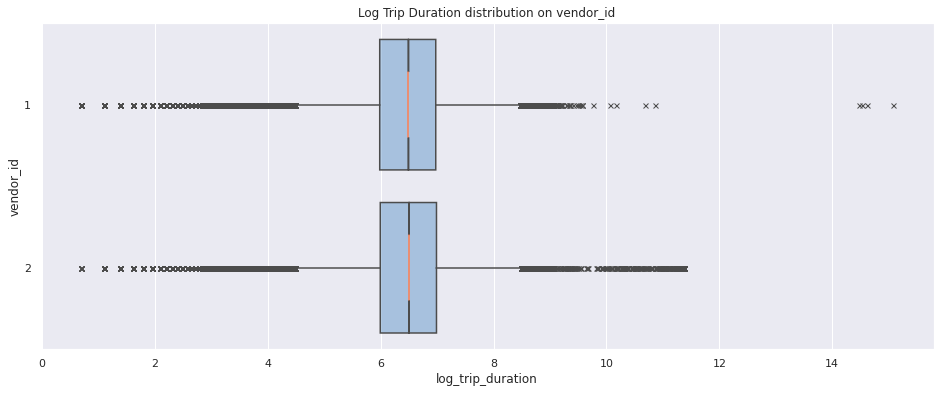

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(data=df, y='vendor_id', x='log_trip_duration', 
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, 
    orient='h')
ax.set_title('Log Trip Duration distribution on vendor_id')
plt.show()

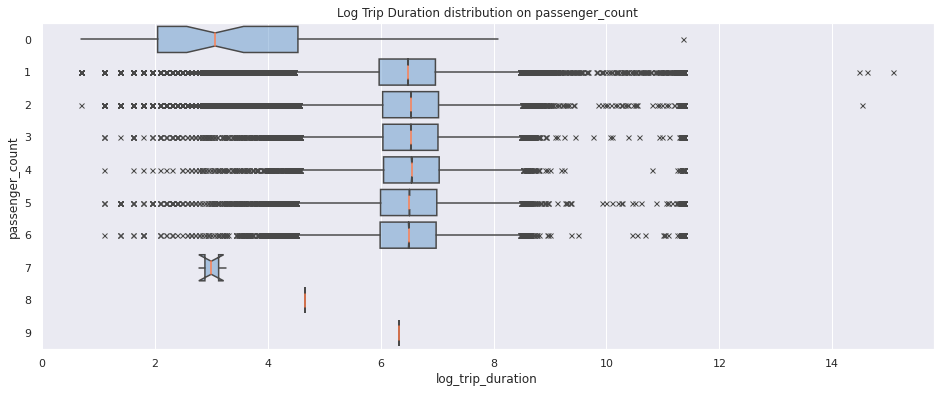

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(data=df, y='passenger_count', x='log_trip_duration', 
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, 
    orient='h')
ax.set_title('Log Trip Duration distribution on passenger_count')
plt.show()

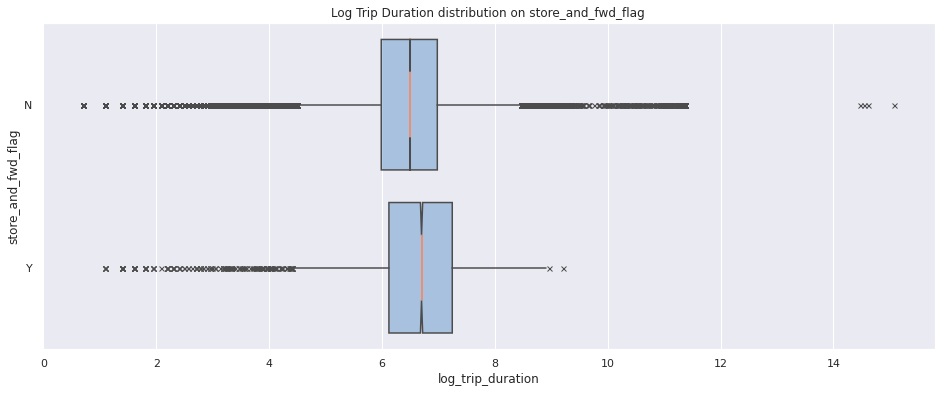

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(data=df, y='store_and_fwd_flag', x='log_trip_duration', 
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, 
    orient='h')
ax.set_title('Log Trip Duration distribution on store_and_fwd_flag')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['vendor_id'] = np.where(df['vendor_id'] == 1, False, True)
df['store_and_fwd_flag'] = np.where(df['store_and_fwd_flag'] == 'N', False, True)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

***Судя по всему, они более-менее бесполезные, по крайней мере влияют слабо.***

***Если не рассматривать поездки на 0 и 7+ человек, то все 3 признака не особо влияют на таргет, хотя мб store_and_fwd_flag чем-то и сможет помочь.***

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train, df_test, y_train, y_test = train_test_split(
    df, df.loc[:,'log_trip_duration'],
    test_size=0.3, random_state=42
)

X_train = df_train.loc[:, df_train.columns != 'log_trip_duration']
X_test = df_test.loc[:, df_test.columns != 'log_trip_duration']

categorical_features = ['vendor_id', 'store_and_fwd_flag', 'passenger_count', 
                        'month', 'weekday', 'hour', 
                        'is_first_anomaly', 'is_second_anomaly',
                        'trip_on_free_roads', 'trip_on_jam_roads', 
                        'pickup_LaGuardia', 'dropoff_LaGuardia',
                        'pickup_Kennedy', 'dropoff_Kennedy']    
numeric_features = ['pickup_longitude', 'pickup_latitude',
                    'dropoff_longitude', 'dropoff_latitude', 'day_of_year', 'log_haversine']

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
column_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('map_grid', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('ridge_regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Test RMSE = %.9f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.9f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.485085748
Train RMSE = 0.485167748


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

***Они внезапно дали буст на добрых 4 тысячных в RMSE, пофиг пусть остаются. ^  ^***

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

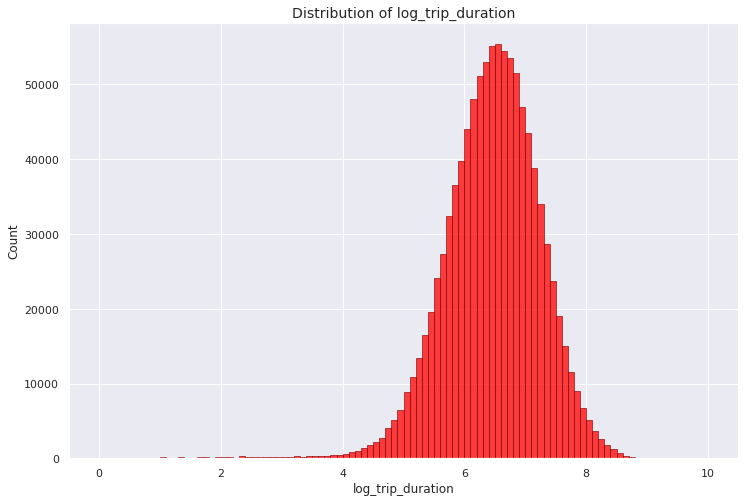

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_title('Distribution of log_trip_duration', fontsize=14)
log_trip_duration_hist = sns.histplot(df_train.loc[:, 'log_trip_duration'], ax=axes, 
                                  bins=100, binrange=(0, 10),
                                  color='red', edgecolor='darkred')
plt.show()

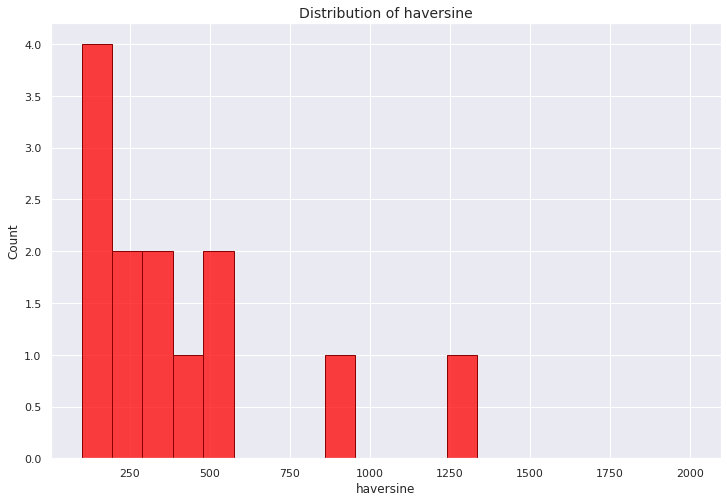

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_title('Distribution of haversine', fontsize=14)
big_haversine_hist = sns.histplot(df_train.loc[df_train['haversine'] > 100, 'haversine'], ax=axes, 
                                  bins=20, binrange=(100, 2000),
                                  color='red', edgecolor='darkred')
plt.show()

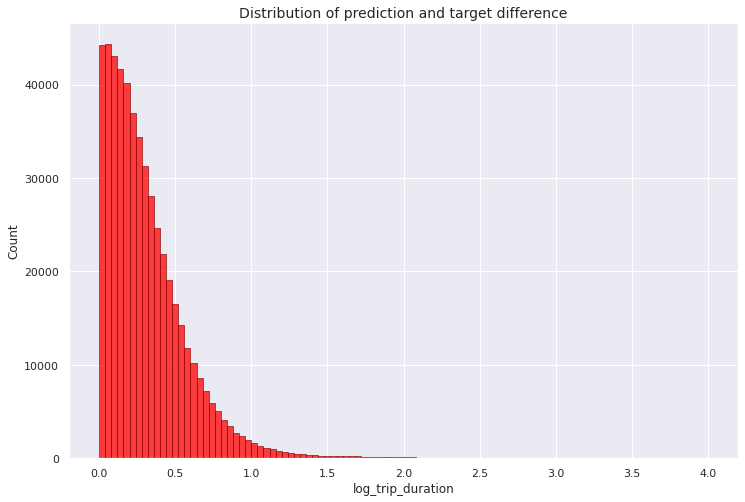

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_title('Distribution of prediction and target difference', fontsize=14)

target_difference = df_train.loc[:, 'log_trip_duration'] - y_train_pred

sns.histplot(target_difference, ax=axes, 
             bins=100, binrange=(0, 4),
             color='red', edgecolor='darkred')

plt.show()

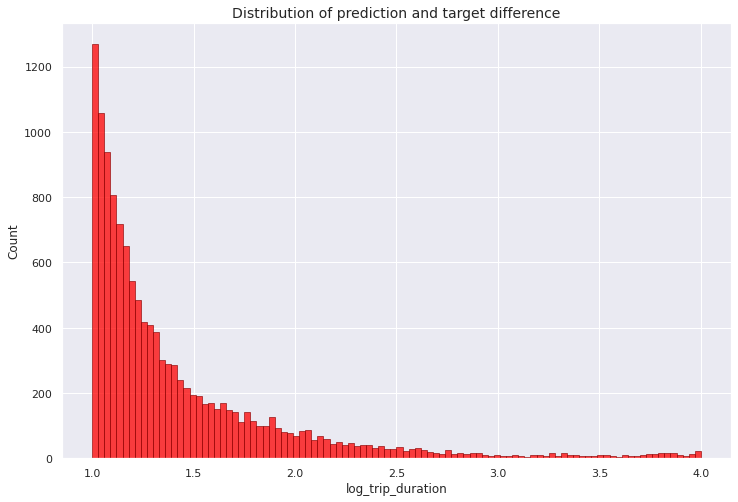

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_title('Distribution of prediction and target difference', fontsize=14)

sns.histplot(target_difference.loc[target_difference > 1], ax=axes, 
             bins=100, binrange=(1, 4),
             color='red', edgecolor='darkred')

plt.show()

In [ ]:
df_train['log_trip_duration_pred'] = y_train_pred
df_train.drop(df_train.loc[abs(df_train['log_trip_duration'] - df_train['log_trip_duration_pred']) > 2.2].index, inplace=True)
df_train.drop(columns=['log_trip_duration_pred'], inplace=True)

In [ ]:
df_train.drop(df_train.loc[df_train['log_trip_duration'] < 4].index, inplace=True)
df_train.drop(df_train.loc[df_train['haversine'] > 100].index, inplace=True)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical_features

['vendor_id',
 'store_and_fwd_flag',
 'passenger_count',
 'month',
 'weekday',
 'hour',
 'is_first_anomaly',
 'is_second_anomaly',
 'trip_on_free_roads',
 'trip_on_jam_roads',
 'pickup_LaGuardia',
 'dropoff_LaGuardia',
 'pickup_Kennedy',
 'dropoff_Kennedy']

***Изменим passenger_count: 0 человек - на среднее; 7,8,9 - на 6.***

In [ ]:
df_train.loc[df_train['passenger_count'].isin([7, 8, 9]), 'passenger_count'] = 6
df_train.loc[df_train['passenger_count'].isin([1, 2, 3, 4, 5, 6]) == False, 'passenger_count'] = round(df.loc[:, 'passenger_count'].mean())

df_test.loc[df_test['passenger_count'].isin([7, 8, 9]), 'passenger_count'] = 6
df_test.loc[df_test['passenger_count'].isin([1, 2, 3, 4, 5, 6]) == False, 'passenger_count'] = round(df.loc[:, 'passenger_count'].mean())

# df_train.drop(df_train.loc[df_train['passenger_count'].isin([0, 7, 8, 9])].index, inplace=True)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [ ]:
X_train = df_train.loc[:, df_train.columns != 'log_trip_duration']
X_test = df_test.loc[:, df_test.columns != 'log_trip_duration']
y_train = df_train.loc[:, 'log_trip_duration']
y_test = df_test.loc[:, 'log_trip_duration']

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Test RMSE = %.9f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.9f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.492941028
Train RMSE = 0.409566386


***Как, в целом, можно было ожидать, мы улучшили RMSE на train-выборке, однако на test-е модель работает немного хуже.***

***Что ж, зато мы избавились от странных точек и работаем интуитивнее.***

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Original number of features:', X_train.shape[1])
column_transformer.fit(X_train)
X_train_transformed = column_transformer.transform(X_train)
print('Number of features after one-hot-encoding:', X_train_transformed.shape[1])

Original number of features: 23
Number of features after one-hot-encoding: 69


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

pipe_lasso = Pipeline([
    ('map_grid', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('lasso_regression', Lasso())
])

model_lasso = pipe_lasso.fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)
y_train_pred = model_lasso.predict(X_train)
print("Test RMSE = %.9f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.9f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.795107039
Train RMSE = 0.729924864


***Lasso-регрессия очевидно хуже.***

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

***Разобьём на обучающую и валидационную внутри GridSearchCV c cv=5. Оно работало больше часа для 10 значений альфа, надеюсь не перезапущу эту клетку случайно @ _ @***

In [ ]:
from sklearn.model_selection import GridSearchCV

pipe_ridge = Pipeline([
    ('map_grid', MapGridTransformer()),
    ('ohe_and_encoding', column_transformer), 
    ('ridge_regression', Ridge())
])

ridge_alphas_grid = {'ridge_regression__alpha' : np.logspace(-2, 3, 10)}
lasso_alphas_grid = {'lasso_regression__alpha' : np.logspace(-2, 3, 10)}

ridge_searcher = GridSearchCV(pipe_ridge, ridge_alphas_grid, scoring='neg_root_mean_squared_error', cv=5)
lasso_searcher = GridSearchCV(pipe_lasso, lasso_alphas_grid, scoring='neg_root_mean_squared_error', cv=5)

ridge_searcher.fit(X_train, y_train)
lasso_searcher.fit(X_train, y_train)


TypeError: ignored

In [ ]:
print('Best Ridge Alpha: %0.5f' % ridge_searcher.best_params_['ridge_regression__alpha'])
print("Test RMSE = %.5f" % ridge_searcher.score(X_test, y_test))

print('Best Lasso Alpha: %0.5f' % lasso_searcher.best_params_['lasso_regression__alpha'])
print("Test RMSE = %.5f" % lasso_searcher.score(X_test, y_test))

Best Ridge Alpha: 0.12915
Test RMSE = -0.49304
Best Lasso Alpha: 0.01000
Test RMSE = -0.51139


In [ ]:
df_train, df_valid, y_train, y_valid  = train_test_split(
    df_train, df_train.loc[:, 'log_trip_duration'], 
    test_size=0.2, random_state=42
)

X_train = df_train.loc[:, df_train.columns != 'log_trip_duration']
X_valid = df_valid.loc[:, df_valid.columns != 'log_trip_duration']

In [ ]:
def grid_search(X, y, pipe, param_grid):
    best_params = []
    best_scores = []
    for name, params in param_grid.items():
        best_param = 0.0
        best_score = 1e9

        for param in params:
            pipe.set_params(**{name: param})
            model = pipe.fit(X, y)
            rmse = mean_squared_error(y, model.predict(X), squared=False)

            if best_score > rmse:
                best_score = rmse
                best_param = param
        
        pipe.set_params(**{name: best_param})
        best_params.append(best_param)
        best_scores.append(best_score)
    
    return best_params, best_scores

In [ ]:
ridge_alphas_grid = {'ridge_regression__alpha' : np.logspace(-2, 3, 20)}
lasso_alphas_grid = {'lasso_regression__alpha' : np.logspace(-5, 0, 20)}

best_ridge_alpha, best_ridge_score = grid_search(X_valid, y_valid, pipe_ridge, ridge_alphas_grid)
best_ridge_alpha, best_ridge_score = best_ridge_alpha[0], best_ridge_score[0]

print('Best ridge alpha:', best_ridge_alpha)
print('Best score on X_valid:', best_ridge_score)

pipe_ridge.set_params(**{'ridge_regression__alpha' : best_ridge_alpha})
model_ridge = pipe_ridge.fit(X_train, y_train)
print('Best score on X_Test:', mean_squared_error(y_test, model_ridge.predict(X_test), squared=False))


Best ridge alpha: 0.03359818286283781
Best score on X_valid: 0.4089542093160176
Best score on X_Test: 0.49165240006039423


In [ ]:
best_lasso_alpha, best_lasso_score = grid_search(X_valid, y_valid, pipe_lasso, lasso_alphas_grid)
best_lasso_alpha, best_lasso_score = best_lasso_alpha[0], best_lasso_score[0]

print('Best lasso alpha:', best_lasso_alpha)
print('Best score on X_valid:', best_lasso_score)

pipe_lasso.set_params(**{'lasso_regression__alpha' : best_lasso_alpha})
model_lasso = pipe_lasso.fit(X_train, y_train)
print('Best score on X_Test:', mean_squared_error(y_test, model_lasso.predict(X_test), squared=False))



Best lasso alpha: 1e-05
Best score on X_valid: 0.4089331938328623
Best score on X_Test: 0.49190593050412307


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def grid_count_nonzeros(X, y, pipe, param_grid):
    count_nonzeros = {}
    for name, params in param_grid.items():
        for param in params:
            pipe.set_params(**{name: param})
            model = pipe.fit(X, y)
            count_nonzeros[param] = np.count_nonzero(model.named_steps['lasso_regression'].coef_)
    
    return count_nonzeros


count_nonzeros_lasso = grid_count_nonzeros(X_valid, y_valid, pipe_lasso, lasso_alphas_grid)

In [ ]:
df_count_nonzeros_lasso = pd.DataFrame(count_nonzeros_lasso.items(), columns=['alpha', 'nonzeros'])

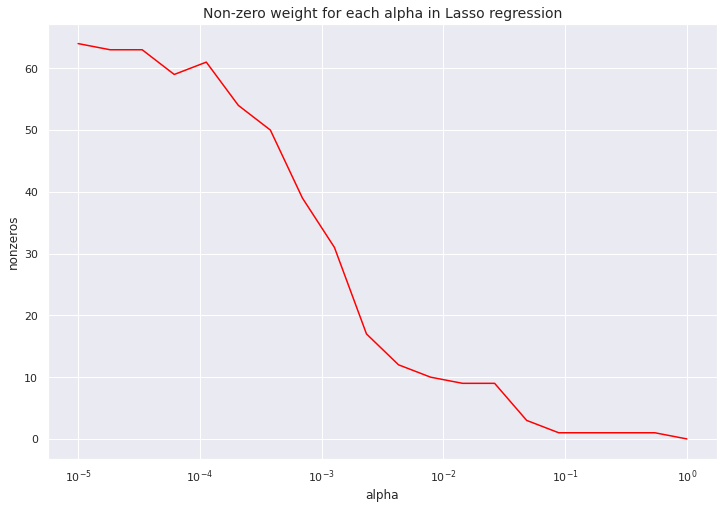

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_title('Non-zero weight for each alpha in Lasso regression', fontsize=14)
g = sns.lineplot(data=df_count_nonzeros_lasso, x='alpha', y='nonzeros', color='red')
g.set(xscale='log')
plt.show()

In [ ]:
def grid_count_nonzeros(X, y, pipe, step_name, param_grid):
    count_nonzeros = {}
    for name, params in param_grid.items():
        for param in params:
            pipe.set_params(**{name: param})
            model = pipe.fit(X, y)
            count_nonzeros[param] = np.count_nonzero(model.named_steps[step_name].coef_)
    
    return count_nonzeros


count_nonzeros_ridge = grid_count_nonzeros(X_valid, y_valid, pipe_ridge, 'ridge_regression', ridge_alphas_grid)
df_count_nonzeros_ridge = pd.DataFrame(count_nonzeros_ridge.items(), columns=['alpha', 'nonzeros'])

***Выглядит адекватно, проверим для Риджа***

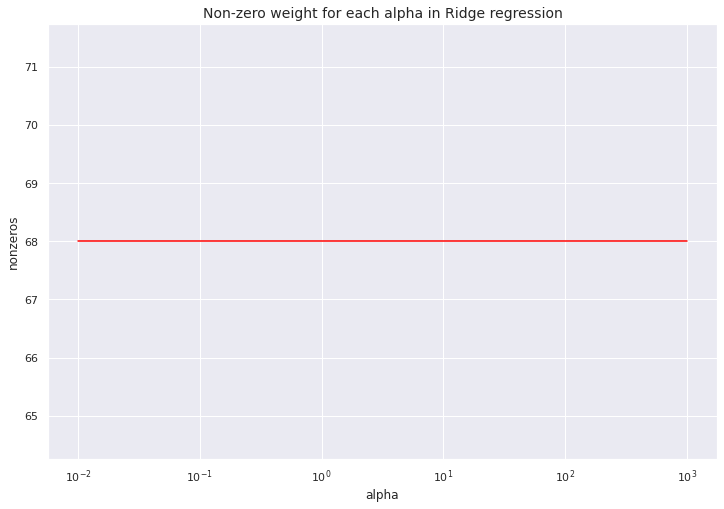

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_title('Non-zero weight for each alpha in Ridge regression', fontsize=14)
g = sns.lineplot(data=df_count_nonzeros_ridge, x='alpha', y='nonzeros', color='red')
g.set(xscale='log')
plt.show()

***68 из 69 фичей - ненулевые при Ridge-регрессии. При Lasso - намного меньше, причём при alpha=0.1 их уже практически не остаётся. Поэтому я сдвинул интервал на logspace(-5, 0, 20)***

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
map_grid_transformer = MapGridTransformer()
map_grid_transformer.fit(X=df_train)
df_transform = map_grid_transformer.transform(X=df)

In [ ]:
df_count_by_cell_pairs = df_transform.groupby(['pickup_cell_no', 'dropoff_cell_no'])[['id']].count().sort_values(by=['id'], ascending=False)
df_count_by_cell_pairs.reset_index(inplace=True)
df_count_by_cell_pairs.head(10)

,pickup_cell_no,dropoff_cell_no,id
0,8,8,125265
1,5,5,61956
2,-1,-1,61207
3,8,5,57920
4,5,8,55425
5,4,4,39967
6,8,-1,39439
7,8,9,36856
8,9,8,35643
9,4,5,35365


***Добавим в качестве признаков n = 100 самых популярных пар.***

In [ ]:
cell_pairs_features_num = 100
feature_name_start = 'cell_pair_'
df_transform['popular_root'] = False

for i in range(cell_pairs_features_num):
    pickup_cell_no, dropoff_cell_no = tuple(df_count_by_cell_pairs.iloc[i][['pickup_cell_no', 'dropoff_cell_no']])
    df_transform.loc[(df_transform['pickup_cell_no'] == pickup_cell_no) & \
                     (df_transform['dropoff_cell_no'] == dropoff_cell_no), 'popular_root'] = True

In [ ]:
df_transform.dtypes

id                            object
vendor_id                       bool
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag              bool
log_trip_duration            float64
weekday                        int64
hour                           int64
month                          int64
day_of_year                    int64
is_first_anomaly                bool
is_second_anomaly               bool
haversine                    float64
log_haversine                float64
trip_on_free_roads              bool
trip_on_jam_roads               bool
pickup_LaGuardia                bool
dropoff_LaGuardia               bool
pickup_Kennedy                  bool
dropoff_Kennedy                 bool
pickup_cell_no                 int64
dropoff_cell_no                int64
popular_root                    bool
d

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

X_train, X_test, y_train, y_test = train_test_split(
    df_transform.loc[:, df_transform.columns != 'log_trip_duration'],
    df_transform.loc[:, 'log_trip_duration'],
    test_size=0.3
)

numeric_features = ['pickup_longitude', 'pickup_latitude',
                    'dropoff_longitude', 'dropoff_latitude', 
                    'day_of_year', 'log_haversine']
not_categorical_features = numeric_features.copy()
not_categorical_features.extend(['id'])
categorical_features = X_train.loc[:, ~X_train.columns.isin(not_categorical_features)].columns

column_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


In [ ]:
pipe_ridge = Pipeline([
    ('map_grid', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('lasso_regression', Ridge(alpha=0.0335))
])

model_ridge = pipe_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
y_train_pred = model_ridge.predict(X_train)

In [ ]:
print("Test RMSE = %.9f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.474994980


In [ ]:
print("Train RMSE = %.9f" % mean_squared_error(y_train, y_train_pred, squared=False))

Train RMSE = 0.008922384


***AAAA НЕ УСПЕВАЮ, НО ДОМАХА КЛАСС***

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.